In [1]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns; sns.set()
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from scipy.stats import mode
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix

In [2]:
iris = datasets.load_iris()

In [3]:
iris.data.shape

(150, 4)

In [4]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
file=iris.data

In [9]:
model = KMeans(n_clusters=3, random_state=45)
clusters = model.fit_predict(file)
model.cluster_centers_.shape

(3, 4)

In [10]:
labels = np.zeros_like(clusters)
for i in range(3):
    mask = (clusters == i)
    labels[mask] = mode(iris.target[mask])[0]

In [11]:
accuracy_score(iris.target, labels)

0.8933333333333333

In [12]:
mat = confusion_matrix(iris.target, labels)
plt.figure(figsize=(3,3))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=set(iris.target),
            yticklabels=set(iris.target))
plt.xlabel('true label')
plt.ylabel('predicted label');

NameError: name 'plt' is not defined

### t-SNE Dimention Reduction

In [13]:
tsne = TSNE(n_components=2, init='random', random_state=8)
transform = tsne.fit_transform(file)

In [14]:
model = KMeans(n_clusters=3, random_state=8)
clusters = model.fit_predict(transform)

In [15]:
labels = np.zeros_like(clusters)
for i in range(3):
    mask = (clusters == i)
    labels[mask] = mode(iris.target[mask])[0]
accuracy_score(iris.target, labels)

0.92

In [16]:
mat = confusion_matrix(iris.target, labels)
plt.figure(figsize=(3,3))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=set(iris.target),
            yticklabels=set(iris.target))
plt.xlabel('true label')
plt.ylabel('predicted label');

NameError: name 'plt' is not defined

ready


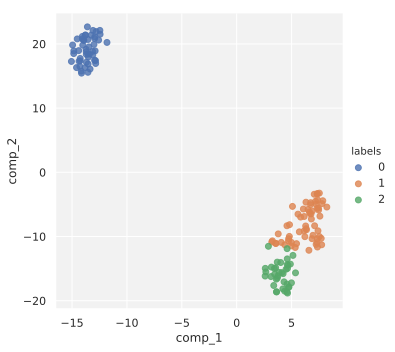

In [17]:
sns.set_style("darkgrid", {"axes.facecolor": ".95"})
%config InlineBackend.figure_format = 'svg'

matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
tsne = pd.DataFrame(transform)
tsne.columns = ["comp_1", "comp_2"]
tsne["labels"] = labels
sns.lmplot("comp_1", "comp_2", hue = "labels", data = tsne.sample(150) ,fit_reg=False)
print("ready")